C:\Users\SURYA\AppData\Local\Temp\ipykernel_20928\3933045714.py:6: DtypeWarning: Columns (27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  race_results = pd.read_csv('Cleaned_Dataset/master_race_results.csv')


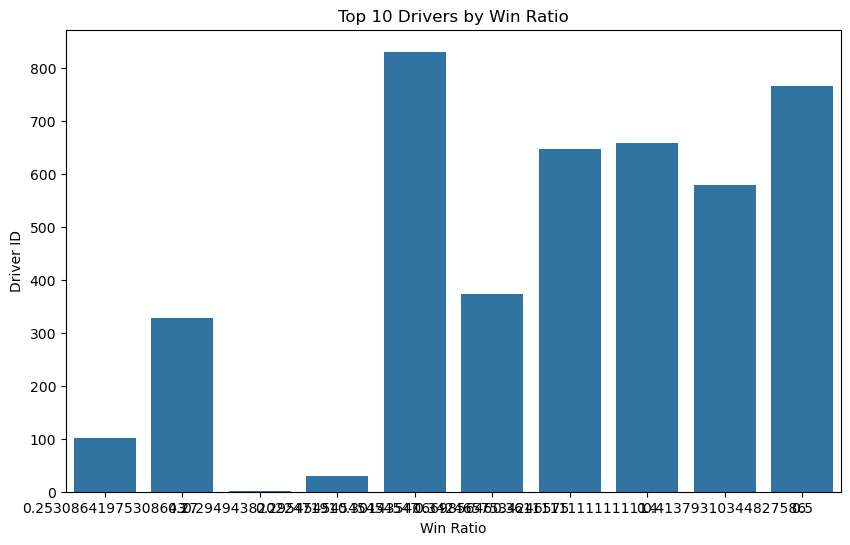

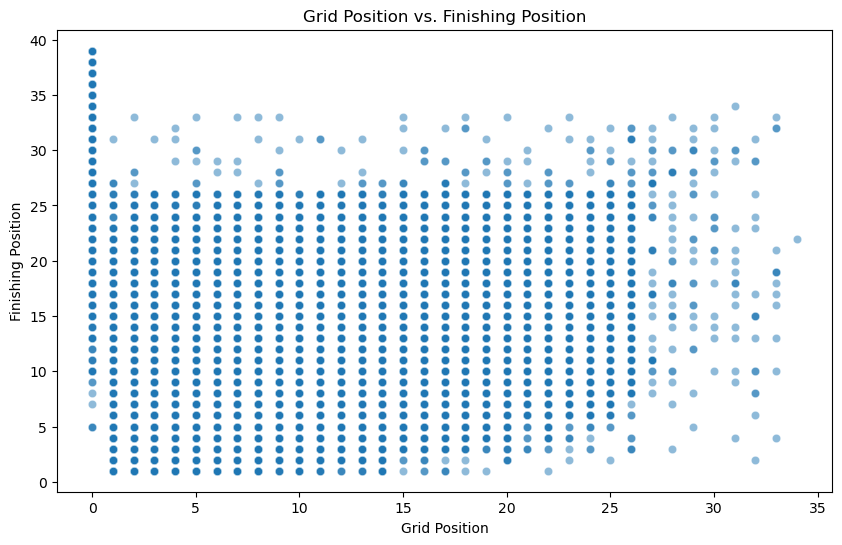

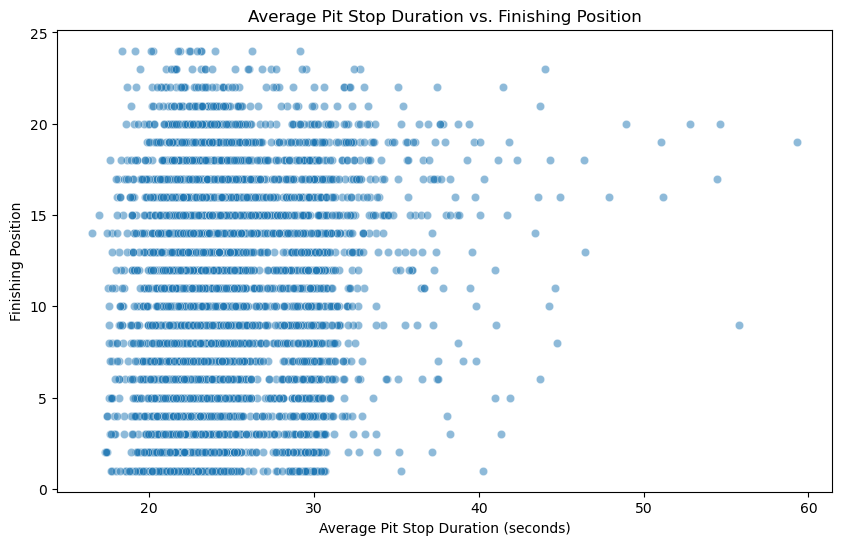

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data ---
race_results = pd.read_csv('Cleaned_Dataset/master_race_results.csv')

# --- Driver Performance: Win Ratios ---
driver_wins = race_results[race_results['positionOrder'] == 1].groupby('driverId').size()
driver_races = race_results.groupby('driverId').size()
driver_win_ratio = (driver_wins / driver_races).fillna(0).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=driver_win_ratio.values, y=driver_win_ratio.index)
plt.title('Top 10 Drivers by Win Ratio')
plt.xlabel('Win Ratio')
plt.ylabel('Driver ID')
plt.savefig('Problem_driver_win_ratio.png')
plt.show()

# --- Qualifying vs. Race Performance ---
plt.figure(figsize=(10,6))
sns.scatterplot(x='grid', y='positionOrder', data=race_results, alpha=0.5)
plt.title('Grid Position vs. Finishing Position')
plt.xlabel('Grid Position')
plt.ylabel('Finishing Position')
plt.savefig('Problem_grid_vs_finish.png')
plt.show()

# --- Pit Stop Strategies ---
pit_stops = pd.read_csv('Cleaned_Dataset/master_pit_stops.csv')
pit_stop_avg_duration = pit_stops.groupby(['raceId', 'driverId'])['duration'].mean().reset_index()
race_pit_duration = pd.merge(race_results[['raceId', 'driverId', 'positionOrder']], pit_stop_avg_duration, on=['raceId', 'driverId'], how='left')

plt.figure(figsize=(10,6))
sns.scatterplot(x='duration', y='positionOrder', data=race_pit_duration, alpha=0.5)
plt.title('Average Pit Stop Duration vs. Finishing Position')
plt.xlabel('Average Pit Stop Duration (seconds)')
plt.ylabel('Finishing Position')
plt.savefig('Problem_pit_stop_duration.png')
plt.show()

# --- Additional Analyses ---
# (Add analyses for other problem statements as needed)